In [ ]:
#Reference : https://absentdata.com/python-graphs/python-word-frequency/

# Importing the required packages
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import ngrams
import seaborn as sns
import matplotlib.pyplot as plt
#imports modules
import os
import glob
import pandas as pd
import random
import io
import re
import string                                       
string.punctuation
import nltk                                 
nltk.download('stopwords')  
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line

In [ ]:
df1 = pd.read_csv(r"diiya978/Downloads/archive/test_data.csv")
df2 = pd.read_csv(r"diiya978/Downloads/archive/test_data.csv")
df1.head()

FileNotFoundError: ignored

# New Section

In [ ]:
df2.head()

Unnamed: 0  Sentence_id  \
0  0           GERRES15609   
1  1           PHERES15784   
2  2           GERREQ10457   
3  3           GERSKL27235   
4  4           HONSSK18415   

                                                                                                                                                                    New_Sentence  \
0  Author and/or Review architecture/design and other technical documents ensuring high quality deliverables and systems development across tech stacks  and applications teams.   
1  Should be able to develop custom dynamic shape, object script and  validation and testing with database.                                                                        
2  Experience in working crosslly with a  larger Engineering Organization and multiple sites highly desired.                                                                       
3  Previous business experience, including but not limited to business  management, engineering, sales, operations, finance, contracts, customer support.                          
4  Delivering fast and right the first  time.                                                                                                                                      

             Type  
0  Responsibility  
1  Responsibility  
2  Requirement     
3  Skill           
4  SoftSkill

In [ ]:
#Reference : https://absentdata.com/python-graphs/python-word-frequency/

# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np

# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base formfrom nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

#import modules
import os
import glob
import pandas as pd
import random
import io

In [ ]:
df1.dropna()
df2.dropna()



Unnamed: 0  Sentence_id  \
0      0           GERRES15609   
1      1           PHERES15784   
2      2           GERREQ10457   
3      3           GERSKL27235   
4      4           HONSSK18415   
...   ..                   ...   
60110  60110       UAERES18030   
60111  60111       GERRES3026    
60112  60112       INDSSK5492    
60113  60113       PHESSK15092   
60114  60114       HONEDU1643    

                                                                                                                                                                                                                                                                                                                                                                             New_Sentence  \
0      Author and/or Review architecture/design and other technical documents ensuring high quality deliverables and systems development across tech stacks  and applications teams.                                                                                                                                                                                                        
1      Should be able to develop custom dynamic shape, object script and  validation and testing with database.                                                                                                                                                                                                                                                                             
2      Experience in working crosslly with a  larger Engineering Organization and multiple sites highly desired.                                                                                                                                                                                                                                                                            
3      Previous business experience, including but not limited to business  management, engineering, sales, operations, finance, contracts, customer support.                                                                                                                                                                                                                               
4      Delivering fast and right the first  time.                                                                                                                                                                                                                                                                                                                                           
...                                           ...                                                                                                                                                                                                                                                                                                                                           
60110  In this position, you will  utilize your program management skills to drive the execution of HTS product portfolio strategy and marketing projects.                                                                                                                                                                                                                                  
60111  In addition, this individual will be responsible for managing 1 or more of our smaller business units with turnover ranging from $10 - $40M. As our parent company Cognizant Technology  Solutions Corporation is listed on Nasdaq we are responsible for maintaining both US GAAP and local GAAP financials, as well as ensuring that we comply with Sarbanes Oxley requirements.   
60112  Good problem  solving skills.                                                                                                                                     

In [ ]:
#My contribution :
#Merges the dataframes into a single dataframe
concat=df1+df2
print(concat)
print(concat.shape)
concat.dropna()
#concat.dropna(subset = ["New_Sentence"], inplace=True)

word_lemmat = WordNetLemmatizer()

def punctuation_remove(t):
  r_punct = "".join([ i for i in t if i not in string.punctuation])
  rem=""
  result = re.sub('','',r_punct)          
  result = re.sub('https://.*','',result)   
  result = re.sub(r'[^w'+rem+']', ' ',result)    
  return r_punct

def extract(concat):
  stop_word_list = set(stopwords.words('english'))
  pd.set_option('display.max_colwidth', -1)
  concat_1 = concat[['New_Sentence', 'Type']]
  concat_1['New_Sentence'] = concat['New_Sentence'].apply(lambda x: punctuation_remove(x))            
  concat_1['New_Sentence'] = concat['New_Sentence'].apply(lambda x: x.lower())                  
  concat_1['New_Sentence'] = concat['New_Sentence'].apply(lambda x: ' '.join([word_lemmat.lemmatize(word) for word in x.split() if word not in (stop_word_list)]))   
  return concat_1
Train = extract(concat)       #printing counts for each class
Train.shape 



            


                                                                                                                                                                                                                                                                                                                                                                                                  New_Sentence  \
0      Collaborate across all of DB&T practices and offerings in AI, Data, IoT  and Cloud platforms to ensure we grow share in world class digital innovation, mobile/web applications helping clients reinvent their businesses.Author and/or Review architecture/design and other technical documents ensuring high quality deliverables and systems development across tech stacks  and applications teams.   
1      Strong  technology expertise in Identity and Access Management.Should be able to develop custom dynamic shape, object script and  validation and testing with database.                      

C:\Users\vsrip\AppData\Local\Temp/ipykernel_4732/2632459924.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


TypeError: 'float' object is not iterable

Series([], Name: Type, dtype: int64)


<BarContainer object of 0 artists>

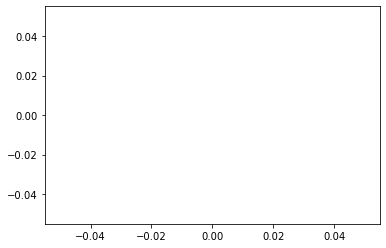

In [ ]:
#Reference : https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy


In [ ]:
#Ref[3]: https://cs230.stanford.edu/blog/split/

#My Contribution :
concat.sort_values(by=["Sentence_id"])  # make sure that the filenames have a fixed order before shuffling
random.seed(230)
data_1=concat.sample(frac = 1)

#Splitting into train, test and dev datasets
"""Code reference [3]"""
split1 = int(0.8 * len(data_1))
split2 = int(0.9 * len(data_1))
train_split = data_1[:split1]
dev_split= data_1[split1:split2]
test_split = data_1[split2:]

In [ ]:
#My contribution:
print(train_split.shape)
print(test_split.shape)
print(dev_split.shape)



(11592, 4)
(1450, 4)
(1449, 4)


In [ ]:

type(train_split)
type(test_split)
type(dev_split)

pandas.core.frame.DataFrame

In [ ]:
print(train_split)


                                                                                                                                                                                                                                                                                                                                                                New_Sentence  \
10432  Bachelor  of Engineering Degree qualified in an engineering field.Strong motivation to learn new things ang  grow professionally.                                                                                                                                                                                                                                       
14665  Key  Focus Areas.The candidate should be well-versed with technology,  policies, and plant operations to develop solutions that can be deployed at our customers.                                                                                                

'X_train_v1,X_val,y_train_v1,y_val = train_test_split(bag_of_words, y, test_size = 0.25, \n                                               random_state = 0, stratify = y)\nX_train,X_test,y_train,y_test = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, \n                                               random_state = 0, stratify = y_train_v1)'

In [ ]:
#Preparing the data for creating the vocabulary list

import numpy as np
from numpy import nan

sentence_list=concat['New_Sentence'].tolist() #Converts the New_Sentence column of the data into list of strings

type(sentence_list)

sentence_list

['Collaborate across all of DB&T practices and offerings in AI, Data, IoT  and Cloud platforms to ensure we grow share in world class digital innovation, mobile/web applications helping clients reinvent their businesses.Author and/or Review architecture/design and other technical documents ensuring high quality deliverables and systems development across tech stacks  and applications teams.',
 'Strong  technology expertise in Identity and Access Management.Should be able to develop custom dynamic shape, object script and  validation and testing with database.',
 'Strong knowledge on Service  Virtualization.Experience in working crosslly with a  larger Engineering Organization and multiple sites highly desired.',
 'Architect scalable data processing and analytics solutions, including technical feasibility for Big Data storage, processing, and consumption e.g., development  of enterprise Data Lake strategy, and heterogeneous data management.Previous business experience, including but not

In [ ]:
#Finding occurrences of each word in the concatenated list of train, test, dev and then creating the vocabulary list

#My Contribution : 
import pandas as pd
from numpy import nan
import math
to_string = str(sentence_list)
to_string = to_string.split()
vocabulary_list=[]
#Creating the vocabulary list 
for item in to_string:
    #print(item+":",len(item))
    if (len(item))>=5:
      vocabulary_list.append(item)
      print(item+":",len(item))
print(train_split)

['Collaborate: 13
across: 6
practices: 9
offerings: 9
Data,: 5
Cloud: 5
platforms: 9
ensure: 6
share: 5
world: 5
class: 5
digital: 7
innovation,: 11
mobile/web: 10
applications: 12
helping: 7
clients: 7
reinvent: 8
their: 5
businesses.Author: 17
and/or: 6
Review: 6
architecture/design: 19
other: 5
technical: 9
documents: 9
ensuring: 8
quality: 7
deliverables: 12
systems: 7
development: 11
across: 6
stacks: 6
applications: 12
teams.',: 8
'Strong: 7
technology: 10
expertise: 9
Identity: 8
Access: 6
Management.Should: 17
develop: 7
custom: 6
dynamic: 7
shape,: 6
object: 6
script: 6
validation: 10
testing: 7
database.',: 11
'Strong: 7
knowledge: 9
Service: 7
Virtualization.Experience: 25
working: 7
crosslly: 8
larger: 6
Engineering: 11
Organization: 12
multiple: 8
sites: 5
highly: 6
desired.',: 10
'Architect: 10
scalable: 8
processing: 10
analytics: 9
solutions,: 10
including: 9
technical: 9
feasibility: 11
storage,: 8
processing,: 11
consumption: 11
e.g.,: 5
development: 11
enterprise: 10

In [ ]:
#Reference[5] : https://www.tutorialspoint.com/find-frequency-of-each-word-in-a-string-in-python
#Compares the list of words in the train set with the vocabulary list and creates a dictionary of words and occurrences per document
#My Contribution:
from collections import Counter

train_set_sentences = train_split['New_Sentence'].tolist() #Converts the train split sentences to list 
type(train_set_sentences)
train_strings = str(train_set_sentences)  #Converts the sentences into strings
final_list=[]
dict_1={}
i=0

for sentence in train_set_sentences:
  final_list.append({"sentence"+str(i): dict_1})  #Appending the dictionary of word,occurrences to final_list

  dict_1 = {}
  i+=1
  word=sentence.split()
  for w in word:
    wfreq=word.count(w)
    if w in vocabulary_list:                      #Compares the words with the frequent vocabulary list and omits the words with less frequency
      dict_1.update({w:wfreq})

print(final_list)



[{'sentence0': {}}, {'sentence1': {'project': 1, 'progress': 1, 'report': 1, 'prescribed': 1, 'format': 1, 'monthly': 1, 'basis': 1, '.Arrange': 1, 'technical': 1, 'sales': 1, 'presentations': 1}}, {'sentence2': {'Proficiency': 1, 'Microsoft': 1, 'Office': 1, 'including': 1, 'Excel,': 1, 'Word,': 1, 'PowerPoint.Strong': 1, 'hands-on': 1, 'ability': 1, 'interfacing': 1, 'Bluetooth': 1, 'device': 1}}, {'sentence3': {'Experience': 1, 'building': 1, 'maintaining': 1, 'relations': 1, 'customers': 1, '(different': 1, 'levels).Knowledge': 1, 'experience': 1, 'regulatory': 1, 'requirements': 1, 'ISO9000:2000,': 1, 'AS9100': 1, 'Quality': 1, 'Systems': 1, 'plus.': 1}}, {'sentence4': {'Design': 1, 'Estimation.Knowledge': 1, 'Sales': 1, 'Performance': 1, 'Management': 1, 'process': 1, '(ICM,': 1, 'Quota': 1, 'Planning,': 2, 'Territory': 1, 'Field': 1, 'Enablement)': 1, 'plus.': 1}}, {'sentence5': {'Ability': 1, 'mentor': 1, 'peers': 1, 'project': 1, 'management': 1, 'standards': 1, 'Finance': 1, 